In [1]:
## Its a classification problem means identifying to which category an object belongs to. In this module, we will analyze what sorts of people were likely to survive.
print("logistic regression problem")
print("titanic survivor")

First logistic regression


In [2]:
data_set_path = "/Users/harshverma/Documents/Jupyter_Notebook_Projects/Data/Titanic"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import data from CSV file
train = pd.read_csv(data_set_path+'/train.csv')

#Analyze the data
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [3]:
#Check the first five entries
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


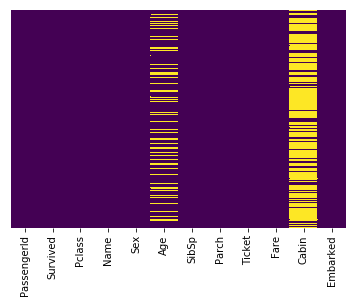

In [5]:
#Checking the missing data using heatmap
sns.heatmap(train.isnull(), yticklabels=False, cbar= False, cmap='viridis')
plt.show()


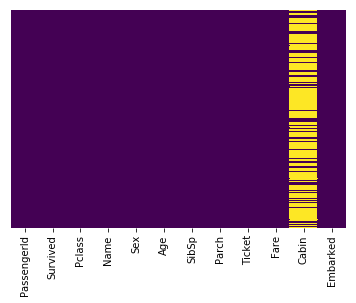

In [9]:
#Create a function to return average age based on passenger class
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age
    
#Fill values
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

#Check the heatmap
sns.heatmap(train.isnull(), yticklabels=False, cbar= False, cmap='viridis')
plt.show()


In [10]:
train.drop(['Cabin', 'Name', 'Ticket'], axis = 1, inplace=True) #inplace = True will not show you the values

#Display first five records
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [11]:
#Create a new variable sex with only one column, 1 as male and 0 as female.
sex = pd.get_dummies(train['Sex'], drop_first = True) #drop_fist = True will drop the first column as not relevant

#Create a new variable embark with two column, if both Q and S are zero it means C is 1. 
embark = pd.get_dummies(train['Embarked'], drop_first = True) #first column is not required

#Drop the old column 'Sex' and 'Embarked'
train.drop(['Sex', 'Embarked'], axis=1, inplace=True)

#Create a new data set with quantitative information
train_new = pd.concat([train, sex, embark], axis=1)

#Display first five values
train_new.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [20]:
#import train_test_split function
from sklearn.model_selection import train_test_split

#Create your input and ouput data set
X = train.drop('Survived', axis = 1)
y = train['Survived']

#Divide your data set into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 100)

#Import the Logistic Regression Model and Train/Tet the model
from sklearn.linear_model import LogisticRegression

#Initialize the model to null
logmodel = LogisticRegression()

# Use fit method to train the model
logmodel.fit(X_train, y_train)

#Use predict method to test the model
predictions = logmodel.predict(X_test)

#Import Classification report from sklearn to show the analysis
from sklearn.metrics import classification_report

# Show classification report parameters
print (classification_report(y_test, predictions))




             precision    recall  f1-score   support

          0       0.70      0.92      0.79       159
          1       0.78      0.42      0.55       109

avg / total       0.73      0.72      0.69       268



In [13]:
print("The model accuracy is 73")

The model accuracy is 70


In [21]:
train_test_split?